# Assignment 61, Determinant: the Laplace expansion

We have the Laplace expansion:

$$det(M) = \sum_{j=1}^{n}(-1)^{i + j}B_{i,j}M_{i, j}$$

This implies a recursive computational routine for computing the determinant of any square matrix. Below, we implement the recursive routine and plot the dependance of its runtime upon the order of the matrix.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

N = 8

def determinant(M, r):
    # base case
    if M.shape == (1,1): 
        return M[0][0]

    det = 0
    for c, e in enumerate(M[r]):
        # Exclude row and column.
        m = np.delete(np.delete(M, r, axis=0), c, axis=1)
        det += ((-1.0) ** (r + e)) * e * determinant(m, r)
    return det

random_matrices = [np.random.rand(n, n) for n in range(1, N + 1)]

execution_times = [0]*len(random_matrices)

for i, M in enumerate(random_matrices):
    ti = time.perf_counter()
    determinant(M, 0)
    tf = time.perf_counter()
    execution_times[i] = tf - ti

x = [n for n in range(1, N + 1)]

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


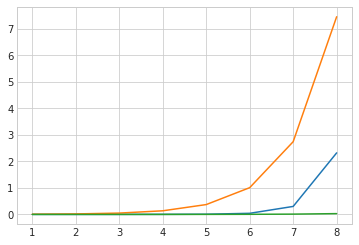

In [2]:
plt.plot(x, execution_times)
plt.plot(x, 0.0025*np.exp(x))
plt.plot(x, 0.00001*np.exp(x))

The graph above shows the runtime of the recursive algorithm for computing the determinant of an $n \times n$ matrix as a function of the value of $n$ in blue. It is bounded between two exponentials, also given as functions of $n$. 

The graph sugggests that $\exp(n)$ is an asymptotically tight bound for $T(n)$, so that $\mathcal{O}(T(n)) \sim \exp(n)$. 

This is truly awful asymptotic performance. For an algorithm to be useful in practice, we generally want its asymptotic runtime to be at least polynomial in the size of its input (better, but more difficult to achieve, is a logarithmic runtime). 

So the recursive algorithm, though straightforward to implement, is not a computationally effective way of computing determinants. 